Having learnt NumPy, we will learn how to use pandas for data analysis. You can think of pandas as an extremely powerful version of Excel, with a lot more features.
**Raw data ---> Import to Pandas ----> Analyze, Manipulate, Process, Do the Datasicence**


--Series

--DataFrames

--Data Manipulations & Processing & Filtering etc.

--Data Input and Output

# Chapter 1 : Series

A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). 
What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.
Array + Labels = Series

In [2]:
import numpy as np
import pandas as pd

### Creating a Series Using Numpy array

In [2]:
porosities = np.array([0.25, 0.31, 0.10])

In [3]:
porosities

array([0.25, 0.31, 0.1 ])

pd.Series(array, index=, dtype*)

In [4]:
poro_series = pd.Series(data= porosities,index=['A', 'B', 'C'], dtype=float)

In [5]:
poro_series

A    0.25
B    0.31
C    0.10
dtype: float64

In [6]:
pd.Series(data= porosities,index=['A', 'B', 'C'], dtype=float, name='MySeries')

A    0.25
B    0.31
C    0.10
Name: MySeries, dtype: float64

In [7]:
depth_wise_poro_series = pd.Series(np.array([0.31, 0.27, 0.25]), index=[1000, 1500, 2000], name='PoroDepth')

<AxesSubplot:>

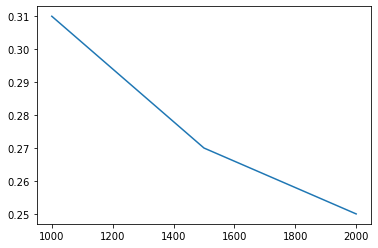

In [9]:
depth_wise_poro_series.plot()

### Detailed Explaination of Series 

1. NumPy Array - For the Values. 
2. Labels - List 
3. Optional - name

In [10]:
poro_array = np.array([0.30, 0.25, 0.22])

poro_labels_depth = [1000, 1500, 2000]

depth_vs_poro_series = pd.Series(data=poro_array, index=poro_labels_depth, name='PGUSeries')

In [11]:
depth_vs_poro_series

1000    0.30
1500    0.25
2000    0.22
Name: PGUSeries, dtype: float64

## Creating a series using a Dictionary

In [12]:
#creating a dictionary

In [13]:
my_fields_perms = {'rockA':120, 'rockB':100, 'rockC': 80}
my_fields_perms_Series =  pd.Series(data=my_fields_perms, name='DictToSeries')

In [14]:
my_fields_perms_Series

rockA    120
rockB    100
rockC     80
Name: DictToSeries, dtype: int64

In [15]:
type(my_fields_perms)

dict

<AxesSubplot:>

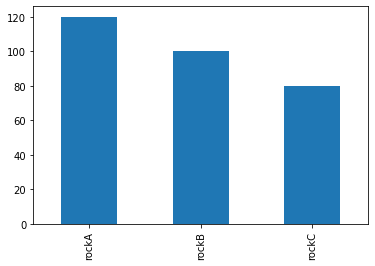

In [16]:
my_fields_perms_Series.plot(kind='bar')

## Chapter 2 : Pandas DataFrames

So, basically :

NumPy array is the most basic brick.

NumPy arrays + Labels/Index = Series

Multiple Series Stacked Next to each other + Common Index = Pandas DF

A DF looks like a table.

In [1]:
common_depth_index = [1000, 1500, 2000]

In [4]:
poro_series_1 = pd.Series(data=np.array([0.35, 0.31, 0.27]), index=common_depth_index)

poro_series_2 = pd.Series(data=np.array([0.32, 0.30, 0.23]), index=common_depth_index)

In [5]:
pd.DataFrame([poro_series_1, poro_series_2])

,1000,1500,2000
0,0.35,0.31,0.27
1,0.32,0.30,0.23


In [6]:
my_perms = np.random.randint(low=10,high=500, size=9).reshape(3,3)

In [7]:
my_perms

array([[390, 437,  75],
       [ 53, 287, 443],
       [495,  40, 267]])

In [8]:
pd.DataFrame(my_perms)

,0,1,2
0,390,437,75
1,53,287,443
2,495,40,267


In [9]:
pd.DataFrame(my_perms, columns=['C1', 'C2', 'C3'])

,C1,C2,C3
0,390,437,75
1,53,287,443
2,495,40,267


In [13]:
pd.DataFrame(my_perms, columns=['C1', 'C2', 'C3'], index=['R1', 'R2', 'R3'])

,C1,C2,C3
R1,390,437,75
R2,53,287,443
R3,495,40,267


In [14]:
pd.DataFrame(my_perms, columns=['C1', 'C2', 'C3'], index=[common_depth_index])

,C1,C2,C3
1000,390,437,75
1500,53,287,443
2000,495,40,267


## Creating a DF using a Dictionary

In [15]:
my_field_data = {'depth':[1000, 1500, 2000], 'poro(%)':[35, 30, 25], 'Perm(mD)':[500, 450, 150]}

In [16]:
my_field_data

{'depth': [1000, 1500, 2000],
 'poro(%)': [35, 30, 25],
 'Perm(mD)': [500, 450, 150]}

In [17]:
pd.DataFrame(my_field_data)

,depth,poro(%),Perm(mD)
0,1000,35,500
1,1500,30,450
2,2000,25,150


In [18]:
df_field = pd.DataFrame(my_field_data, index=common_depth_index)

In [19]:
df_field

,depth,poro(%),Perm(mD)
1000,1000,35,500
1500,1500,30,450
2000,2000,25,150


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

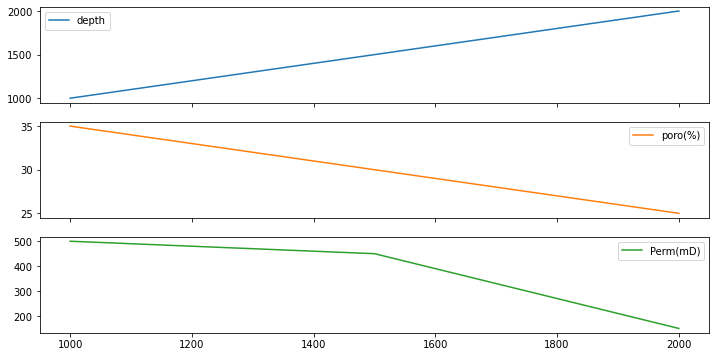

In [20]:
df_field.plot(subplots=True, figsize=(12, 6))

### Accessing Columns and Rows

In [21]:
df_field

,depth,poro(%),Perm(mD)
1000,1000,35,500
1500,1500,30,450
2000,2000,25,150


In [22]:
# df['columnname']

In [23]:
df_field['poro(%)']

1000    35
1500    30
2000    25
Name: poro(%), dtype: int64

In [24]:
type(df_field['poro(%)'])

pandas.core.series.Series

<AxesSubplot:>

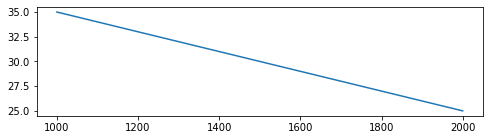

In [25]:
df_field['poro(%)'].plot(figsize=(8,2))

<AxesSubplot:>

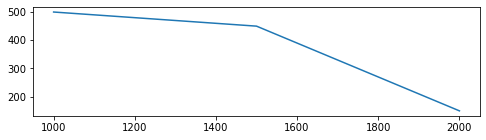

In [26]:
df_field['Perm(mD)'].plot(figsize=(8,2))

In [27]:
df_field[['poro(%)','Perm(mD)']]

,poro(%),Perm(mD)
1000,35,500
1500,30,450
2000,25,150


### Acessing Rows, Columns, Range of Rows/Columns

1. loc : labels 
2. iloc : index


df.loc[loc1 :loc2, loc1:loc2]

In [28]:
## Excercise : Access the Poro-Perm Columns and last 2 rows
#### 1. Using loc : both start and end are included

In [29]:
df_field

,depth,poro(%),Perm(mD)
1000,1000,35,500
1500,1500,30,450
2000,2000,25,150


In [30]:
df_field.loc[1500:2000, 'poro(%)':'Perm(mD)']

,poro(%),Perm(mD)
1500,30,450
2000,25,150


In [31]:
## Excercise 2 : All columns but only 2000 Depth row

In [32]:
df_field.loc[2000:2000, :]

,depth,poro(%),Perm(mD)
2000,2000,25,150


#### 2. iloc : start is included, end is excluded

In [33]:
df_field

,depth,poro(%),Perm(mD)
1000,1000,35,500
1500,1500,30,450
2000,2000,25,150


In [34]:
## Excercise : Access the Poro-Perm Columns and last 2 rows

In [35]:
#example, 1st row, 2nd column
df_field.iloc[0, 1]

35

In [36]:
#example, 1st row, All columns
df_field.iloc[0:0+1, :]

,depth,poro(%),Perm(mD)
1000,1000,35,500


In [37]:
# Access the Poro-Perm Columns and last 2 rows
df_field.iloc[1:3, 1:3]

,poro(%),Perm(mD)
1500,30,450
2000,25,150


In [38]:
# Access the Poro-Perm Columns and last 2 rows
df_field.iloc[1:10, 1:10]

,poro(%),Perm(mD)
1500,30,450
2000,25,150


### creating new columns

In [39]:
df_field

,depth,poro(%),Perm(mD)
1000,1000,35,500
1500,1500,30,450
2000,2000,25,150


In [40]:
df_field['PoroPermProduct'] = (0.01*df_field['poro(%)'])*df_field['Perm(mD)']

In [41]:
df_field

,depth,poro(%),Perm(mD),PoroPermProduct
1000,1000,35,500,175.0
1500,1500,30,450,135.0
2000,2000,25,150,37.5


In [46]:
geothermal_grad = 0.008
df_field['Temp(C)'] = df_field['depth']*geothermal_grad

In [47]:
df_field

,depth,poro(%),Perm(mD),PoroPermProduct,Temp(C)
1000,1000,35,500,175.0,8.0
1500,1500,30,450,135.0,12.0
2000,2000,25,150,37.5,16.0


### Dropping a column

In [48]:
df_field.drop('Temp(C)', axis='columns', inplace=True)

In [49]:
df_field

,depth,poro(%),Perm(mD),PoroPermProduct
1000,1000,35,500,175.0
1500,1500,30,450,135.0
2000,2000,25,150,37.5


### Conditional Selection

In [50]:
## Returns Subset of Data based on various > or == or != or < or >= or <= type conditions

In [51]:
df_field

,depth,poro(%),Perm(mD),PoroPermProduct
1000,1000,35,500,175.0
1500,1500,30,450,135.0
2000,2000,25,150,37.5


In [52]:
## Example 1 : Print only those rows with a Porosity higher than or equal to 30%

In [53]:
df_field[df_field['poro(%)'] >= 30]

,depth,poro(%),Perm(mD),PoroPermProduct
1000,1000,35,500,175.0
1500,1500,30,450,135.0


In [64]:
# Condition 1 : Poro >= 30

# Condition2 : Perm >= 500 mD

# Condition 1 AND Conditon 2 Must be followed

In [65]:
#poro_threshhold = float(input('Enter Poro(%) Threshold: '))
#perm_threshhold = float(input('Enter Perm(mD) Threshold: '))


#df_field[(df_field['poro(%)'] >= poro_threshhold) & (df_field['Perm(mD)'] >= perm_threshhold)]

In [66]:
#df_field[(df_field['poro(%)'] >= poro_threshhold) | (df_field['Perm(mD)'] >= perm_threshhold)]

### Input & Output

In [72]:
df_field.to_csv('PoroPermData_1405.csv')

In [73]:
pd.read_csv('PoroPermData_1405.csv')

,Unnamed: 0,depth,poro(%),Perm(mD),PoroPermProduct
0,1000,1000,35,500,175.0
1,1500,1500,30,450,135.0
2,2000,2000,25,150,37.5


## 1. GroupBy 2. Joining Tables / Merging Tables  

In [3]:
import pandas as pd

In [2]:
df_lith_poro_perm = {'LITH':['SST', 'SST', 'LST', 'LST', 'SST', 'LST'], 
                    'PORO(%)': [31, 22, 10, 9, 24, 11]}


In [3]:
df_lith_poro_perm = pd.DataFrame(df_lith_poro_perm)

In [4]:
df_lith_poro_perm

,LITH,PORO(%)
0,SST,31
1,SST,22
2,LST,10
3,LST,9
4,SST,24
5,LST,11


In [5]:
df_lith_poro_perm['Perm(md)'] = 0.15*df_lith_poro_perm['PORO(%)']**2

In [6]:
df_lith_poro_perm

,LITH,PORO(%),Perm(md)
0,SST,31,144.15
1,SST,22,72.60
2,LST,10,15.00
3,LST,9,12.15
4,SST,24,86.40
5,LST,11,18.15


In [7]:
df_lith_poro_perm['LITH'].unique()

array(['SST', 'LST'], dtype=object)

### Lets implement groupby

In [11]:
## 1. Avg of Porosities by Lithology

In [4]:
import numpy as np

In [14]:
df_lith_poro_perm.groupby(by='LITH').agg(np.mean)[['PORO(%)']]

,PORO(%)
LITH,
LST,10.000000
SST,25.666667


In [15]:
# 2. Count the Number of SST samples and LST Samples

In [16]:
df_lith_poro_perm['LITH'].value_counts()

LST    3
SST    3
Name: LITH, dtype: int64

In [17]:
df_lith_poro_perm.groupby('LITH').agg(np.mean)[['Perm(md)']]

,Perm(md)
LITH,
LST,15.10
SST,101.05


In [21]:
condition = df_lith_poro_perm['LITH'] == 'SST'
df_subset = df_lith_poro_perm[condition]
df_subset_agg = df_subset.groupby(by='LITH').agg(np.mean)[['PORO(%)']]

In [22]:
df_subset_agg

,PORO(%)
LITH,
SST,25.666667


In [23]:
### df_subset[(df_lith_poro_perm ['LITH']=='SST')].groupby(by='LITH').agg(np.mean)[['PORO(%)']]

In [24]:
df_lith_poro_perm['XYZ'] = ['X', 'Y', 'Z', 'A', 'B', 'C']

In [25]:
df_lith_poro_perm

,LITH,PORO(%),Perm(md),XYZ
0,SST,31,144.15,X
1,SST,22,72.60,Y
2,LST,10,15.00,Z
3,LST,9,12.15,A
4,SST,24,86.40,B
5,LST,11,18.15,C


In [26]:
df_lith_poro_perm.groupby(by='LITH').agg(np.mean)

,PORO(%),Perm(md)
LITH,,
LST,10.000000,15.10
SST,25.666667,101.05


### Joining/Merging Tables

In [6]:
df1 = pd.DataFrame({'Names':['A', 'B', 'C'], 'Math_Marks':[60, 70, 90]})

In [7]:
df1

,Names,Math_Marks
0,A,60
1,B,70
2,C,90


In [8]:
df2 = pd.DataFrame({'Names':['B', 'C', 'D', 'E'], 'Science_Marks':[80,95,20,60]})

In [9]:
df2

,Names,Science_Marks
0,B,80
1,C,95
2,D,20
3,E,60


### Ex1 : For all students who appeared in Math exam, I want their science marks in another column as well

In [10]:
base_table = df1

In [11]:
additional_details_table = df2

In [12]:
joined_table = base_table.merge(right=additional_details_table, on='Names', how='left')

In [13]:
joined_table

,Names,Math_Marks,Science_Marks
0,A,60,NaN
1,B,70,80.0
2,C,90,95.0


In [14]:
base_table = df2

In [15]:
additional_details_table = df1

In [16]:
joined_table = base_table.merge(right=additional_details_table, on='Names', how='left')

In [17]:
joined_table

,Names,Science_Marks,Math_Marks
0,B,80,70.0
1,C,95,90.0
2,D,20,NaN
3,E,60,NaN


In [18]:
base_table.merge(right=additional_details_table, on='Names', how='inner')

,Names,Science_Marks,Math_Marks
0,B,80,70
1,C,95,90


In [19]:
base_table.merge(right=additional_details_table, on='Names', how='outer')

,Names,Science_Marks,Math_Marks
0,B,80.0,70.0
1,C,95.0,90.0
2,D,20.0,NaN
3,E,60.0,NaN
4,A,NaN,60.0
